In [1]:
from bacp import BaCPTrainer, BaCPTrainingArguments
from trainer import Trainer, TrainingArguments
from utils import print_statistics, get_device, get_num_workers, print_dynamic_lambdas_statistics, load_object, save_object
from constants import *

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL_NAME = 'resnet50'
MODEL_TASK = 'cifar10'
FINETUNED_WEIGHTS = './research/resnet50/cifar10/resnet50_cifar10_baseline.pt'
TRAIN = False
DEVICE = get_device()
NUM_WORKERS = get_num_workers()
print("Using device:", DEVICE)
print("Using", NUM_WORKERS, "workers")

Using device: cuda
Using 288 workers


## Baseline Check

In [ ]:
training_args = TrainingArguments(
    model_name=MODEL_NAME,
    model_task=MODEL_TASK,
    batch_size=BATCH_SIZE_CNN,
    optimizer_type_and_lr=('sgd', 0.01),
    scheduler_type='linear_with_warmup',
    epochs=100,
    learning_type="baseline",
    patience=50,
    db=False,
)
trainer = Trainer(training_args=training_args)
metrics = trainer.evaluate()
print_statistics(metrics, trainer)

## BaCP

In [4]:
# Initializing finetuned weights path
finetuned_weights = f"./research/{MODEL_NAME}/{MODEL_TASK}/{MODEL_NAME}_{MODEL_TASK}_baseline.pt"

bacp_training_args = BaCPTrainingArguments(
    model_name=MODEL_NAME,
    model_task=MODEL_TASK,
    batch_size=BATCH_SIZE_CNN,
    optimizer_type_and_lr=('sgd', 0.1),
    pruning_type='magnitude_pruning',
    target_sparsity=TARGET_SPARSITY_LOW,
    sparsity_scheduler='cubic',
    finetuned_weights=finetuned_weights,
    learning_type='bacp_pruning_b1',
    db=False,
)
bacp_trainer = BaCPTrainer(bacp_training_args, lambdas=None)
if False:
    bacp_trainer.train()
    print_dynamic_lambdas_statistics(bacp_trainer)

bacp_trainer.generate_mask_from_model()
training_args = TrainingArguments(
    model_name=bacp_trainer.model_name,
    model_task=bacp_trainer.model_task,
    batch_size=bacp_trainer.batch_size,
    optimizer_type_and_lr=('adamw', 0.0001),
    pruner=bacp_trainer.get_pruner(),
    pruning_type=bacp_trainer.pruning_type,
    target_sparsity=bacp_trainer.target_sparsity,
    epochs=50,
    finetuned_weights=bacp_trainer.save_path,
    finetune=True,
    learning_type="bacp_b1_finetune",
    db=False,
)
trainer = Trainer(training_args)
if False:
    trainer.train()

metrics = trainer.evaluate()
print_statistics(metrics, trainer)

[TRAINER] Image size: 32
[ERROR] Could not load weights: ./research/resnet50/cifar10/resnet50_cifar10_baseline.pt
[ERROR] Attempting partial load
[TRAINER] Weights loaded successfully
[TRAINER] Initialized BaCP models
[TRAINER] Optimizer type w/ learning rate: (sgd, 0.1)
[TRAINER] No scheduler initialized
[CV DATALOADERS] Loaded cifar10 with splits: ['train', 'validation', 'test']
[TRAINER] Data Initialized for model task: cifar10
[TRAINER] Batch size: 512
[TRAINER] Number of dataloders: 3
[TRAINER] Pruning initialized
[TRAINER] Pruning type: magnitude_pruning
[TRAINER] Target sparsity: 0.95
[TRAINER] Sparsity scheduler: cubic
[TRAINER] Pruning epochs: 5
[TRAINER] Current sparsity: 0.0000
[TRAINER] Saving model to: ./research/resnet50/cifar10/resnet50_cifar10_magnitude_pruning_0.95_bacp_pruning_b1.pt
[BaCP TRAINER] Mask generated from current model.
[TRAINER] Image size: 32
[TRAINER] Initialized models
[TRAINER] Loading weights: ./research/resnet50/cifar10/resnet50_cifar10_magnitude_pr


TRAINING STATISTICS SUMMARY

Performance Metrics:
------------------------------
  Accuracy:     93.24%

Model Information:
------------------------------
  Total Parameters:     23,520,842
  Trainable Parameters: 23,520,842
  Model Sparsity:       0.9500 (95.00%)

Training Configuration:
------------------------------
  Model:                resnet50
  Task:                 cifar10
  Learning Type:        bacp_b1_finetune
  Batch Size:           512
  Learning Rate:        0.0001
  Optimizer:            adamw
  Epochs:               50

System Information:
------------------------------
  Device:               cuda
  Mixed Precision:      True
  Workers:              24



In [5]:
# Initializing finetuned weights path
finetuned_weights = f"./research/{MODEL_NAME}/{MODEL_TASK}/{MODEL_NAME}_{MODEL_TASK}_baseline.pt"

bacp_training_args = BaCPTrainingArguments(
    model_name=MODEL_NAME,
    model_task=MODEL_TASK,
    batch_size=BATCH_SIZE_CNN,
    optimizer_type_and_lr=('sgd', 0.1),
    pruning_type='magnitude_pruning',
    target_sparsity=TARGET_SPARSITY_MID,
    sparsity_scheduler='cubic',
    finetuned_weights=finetuned_weights,
    learning_type='bacp_pruning_b1',
    db=False,
)
bacp_trainer = BaCPTrainer(bacp_training_args, lambdas=None)
if False:
    bacp_trainer.train()
    print_dynamic_lambdas_statistics(bacp_trainer)

bacp_trainer.generate_mask_from_model()
training_args = TrainingArguments(
    model_name=bacp_trainer.model_name,
    model_task=bacp_trainer.model_task,
    batch_size=bacp_trainer.batch_size,
    optimizer_type_and_lr=('adamw', 0.0001),
    pruner=bacp_trainer.get_pruner(),
    pruning_type=bacp_trainer.pruning_type,
    target_sparsity=bacp_trainer.target_sparsity,
    epochs=50,
    finetuned_weights=bacp_trainer.save_path,
    finetune=True,
    learning_type="bacp_b1_finetune",
    db=False,
)
trainer = Trainer(training_args)
if False:
    trainer.train()

metrics = trainer.evaluate()
print_statistics(metrics, trainer)

[TRAINER] Image size: 32
[ERROR] Could not load weights: ./research/resnet50/cifar10/resnet50_cifar10_baseline.pt
[ERROR] Attempting partial load
[TRAINER] Weights loaded successfully
[TRAINER] Initialized BaCP models
[TRAINER] Optimizer type w/ learning rate: (sgd, 0.1)
[TRAINER] No scheduler initialized
[CV DATALOADERS] Loaded cifar10 with splits: ['train', 'validation', 'test']
[TRAINER] Data Initialized for model task: cifar10
[TRAINER] Batch size: 512
[TRAINER] Number of dataloders: 3
[TRAINER] Pruning initialized
[TRAINER] Pruning type: magnitude_pruning
[TRAINER] Target sparsity: 0.97
[TRAINER] Sparsity scheduler: cubic
[TRAINER] Pruning epochs: 5
[TRAINER] Current sparsity: 0.0000
[TRAINER] Saving model to: ./research/resnet50/cifar10/resnet50_cifar10_magnitude_pruning_0.97_bacp_pruning_b1.pt
[BaCP TRAINER] Mask generated from current model.
[TRAINER] Image size: 32
[TRAINER] Initialized models
[TRAINER] Loading weights: ./research/resnet50/cifar10/resnet50_cifar10_magnitude_pr


TRAINING STATISTICS SUMMARY

Performance Metrics:
------------------------------
  Accuracy:     93.11%

Model Information:
------------------------------
  Total Parameters:     23,520,842
  Trainable Parameters: 23,520,842
  Model Sparsity:       0.9700 (97.00%)

Training Configuration:
------------------------------
  Model:                resnet50
  Task:                 cifar10
  Learning Type:        bacp_b1_finetune
  Batch Size:           512
  Learning Rate:        0.0001
  Optimizer:            adamw
  Epochs:               50

System Information:
------------------------------
  Device:               cuda
  Mixed Precision:      True
  Workers:              24



In [6]:
# Initializing finetuned weights path
finetuned_weights = f"./research/{MODEL_NAME}/{MODEL_TASK}/{MODEL_NAME}_{MODEL_TASK}_baseline.pt"

bacp_training_args = BaCPTrainingArguments(
    model_name=MODEL_NAME,
    model_task=MODEL_TASK,
    batch_size=BATCH_SIZE_CNN,
    optimizer_type_and_lr=('sgd', 0.1),
    pruning_type='magnitude_pruning',
    target_sparsity=TARGET_SPARSITY_HIGH,
    sparsity_scheduler='cubic',
    finetuned_weights=finetuned_weights,
    learning_type='bacp_pruning_b1',
    db=False,
)
bacp_trainer = BaCPTrainer(bacp_training_args, lambdas=None)
if False:
    bacp_trainer.train()
    print_dynamic_lambdas_statistics(bacp_trainer)

bacp_trainer.generate_mask_from_model()
training_args = TrainingArguments(
    model_name=bacp_trainer.model_name,
    model_task=bacp_trainer.model_task,
    batch_size=bacp_trainer.batch_size,
    optimizer_type_and_lr=('adamw', 0.0001),
    pruner=bacp_trainer.get_pruner(),
    pruning_type=bacp_trainer.pruning_type,
    target_sparsity=bacp_trainer.target_sparsity,
    epochs=50,
    finetuned_weights=bacp_trainer.save_path,
    finetune=True,
    learning_type="bacp_b1_finetune",
    db=False,
)
trainer = Trainer(training_args)
if False:
    trainer.train()

metrics = trainer.evaluate()
print_statistics(metrics, trainer)

[TRAINER] Image size: 32
[ERROR] Could not load weights: ./research/resnet50/cifar10/resnet50_cifar10_baseline.pt
[ERROR] Attempting partial load
[TRAINER] Weights loaded successfully
[TRAINER] Initialized BaCP models
[TRAINER] Optimizer type w/ learning rate: (sgd, 0.1)
[TRAINER] No scheduler initialized
[CV DATALOADERS] Loaded cifar10 with splits: ['train', 'validation', 'test']
[TRAINER] Data Initialized for model task: cifar10
[TRAINER] Batch size: 512
[TRAINER] Number of dataloders: 3
[TRAINER] Pruning initialized
[TRAINER] Pruning type: magnitude_pruning
[TRAINER] Target sparsity: 0.99
[TRAINER] Sparsity scheduler: cubic
[TRAINER] Pruning epochs: 5
[TRAINER] Current sparsity: 0.0000
[TRAINER] Saving model to: ./research/resnet50/cifar10/resnet50_cifar10_magnitude_pruning_0.99_bacp_pruning_b1.pt
[BaCP TRAINER] Mask generated from current model.
[TRAINER] Image size: 32
[TRAINER] Initialized models
[TRAINER] Loading weights: ./research/resnet50/cifar10/resnet50_cifar10_magnitude_pr


TRAINING STATISTICS SUMMARY

Performance Metrics:
------------------------------
  Accuracy:     91.93%

Model Information:
------------------------------
  Total Parameters:     23,520,842
  Trainable Parameters: 23,520,842
  Model Sparsity:       0.9900 (99.00%)

Training Configuration:
------------------------------
  Model:                resnet50
  Task:                 cifar10
  Learning Type:        bacp_b1_finetune
  Batch Size:           512
  Learning Rate:        0.0001
  Optimizer:            adamw
  Epochs:               50

System Information:
------------------------------
  Device:               cuda
  Mixed Precision:      True
  Workers:              24



In [3]:
lambda_history_1 = load_object('./resnet50_cifar10_magnitude_pruning_0.95_lambda_history.pkl')
lambda_history_2 = load_object('./resnet50_cifar10_magnitude_pruning_0.97_lambda_history.pkl')
lambda_history_3 = load_object('./resnet50_cifar10_magnitude_pruning_0.99_lambda_history.pkl')

PRUNING_TYPE = 'magnitude_pruning'

Object loaded successfully from ./resnet50_cifar10_magnitude_pruning_0.95_lambda_history.pkl
Object loaded successfully from ./resnet50_cifar10_magnitude_pruning_0.97_lambda_history.pkl
Object loaded successfully from ./resnet50_cifar10_magnitude_pruning_0.99_lambda_history.pkl


/home/ubuntu/BaCP-1/project/utils.py:105: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  values = torch.tensor(lambda_history[key]).detach().cpu().numpy()


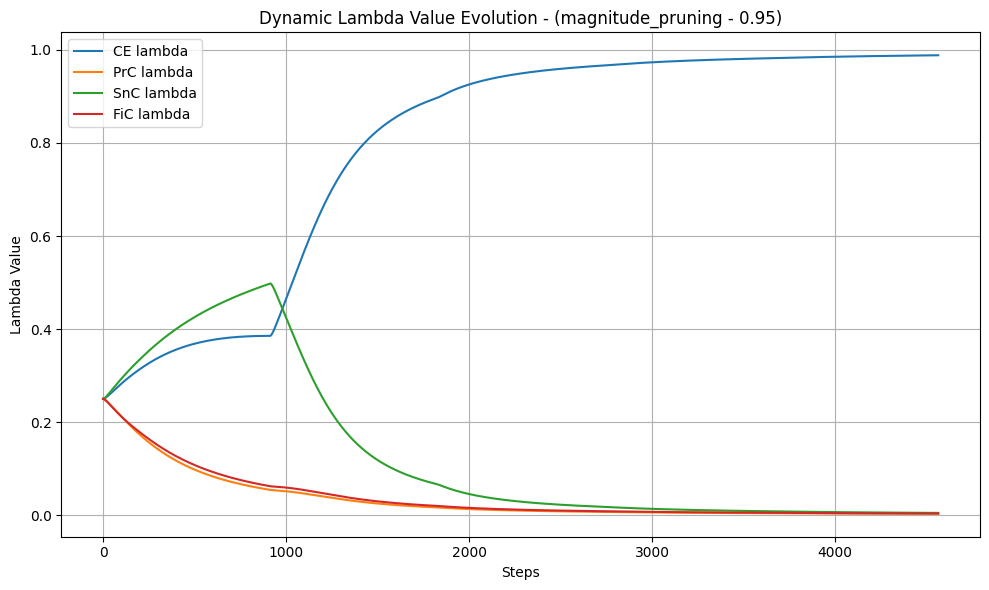

=== Lambda Statistics ===
CE lambda:
  Initial: 0.2500
  Final:   0.9884
  Change:  0.7384 (+295.37%)
  Mean:    0.7949
  StdDev:  0.2541

PrC lambda:
  Initial: 0.2500
  Final:   0.0030
  Change:  -0.2470 (-98.79%)
  Mean:    0.0350
  StdDev:  0.0521

SnC lambda:
  Initial: 0.2500
  Final:   0.0049
  Change:  -0.2451 (-98.03%)
  Mean:    0.1317
  StdDev:  0.1669

FiC lambda:
  Initial: 0.2500
  Final:   0.0036
  Change:  -0.2464 (-98.54%)
  Mean:    0.0384
  StdDev:  0.0535



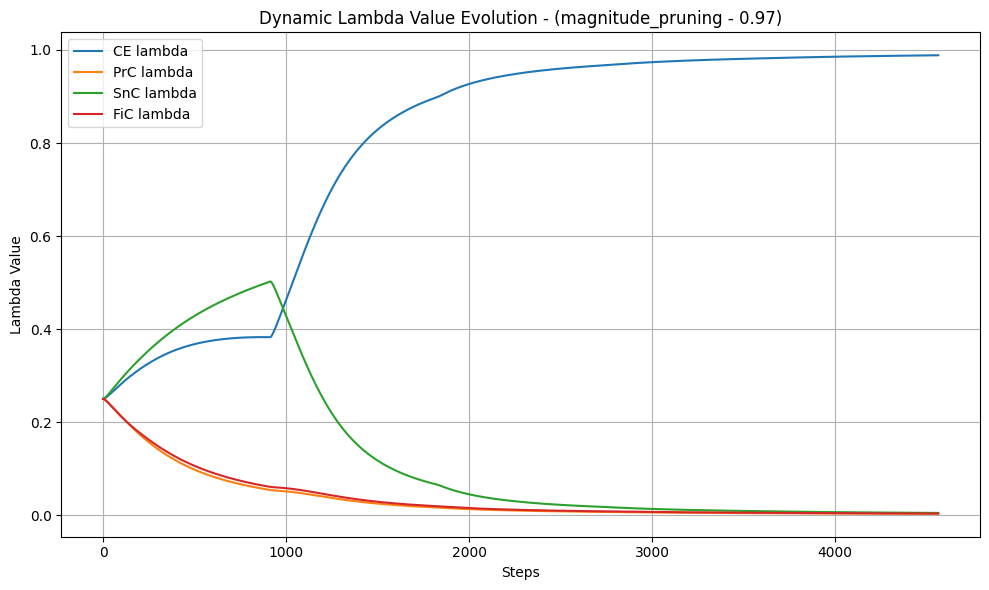

=== Lambda Statistics ===
CE lambda:
  Initial: 0.2500
  Final:   0.9886
  Change:  0.7386 (+295.46%)
  Mean:    0.7953
  StdDev:  0.2547

PrC lambda:
  Initial: 0.2500
  Final:   0.0030
  Change:  -0.2470 (-98.81%)
  Mean:    0.0349
  StdDev:  0.0521

SnC lambda:
  Initial: 0.2500
  Final:   0.0048
  Change:  -0.2452 (-98.06%)
  Mean:    0.1320
  StdDev:  0.1682

FiC lambda:
  Initial: 0.2500
  Final:   0.0035
  Change:  -0.2465 (-98.59%)
  Mean:    0.0377
  StdDev:  0.0532



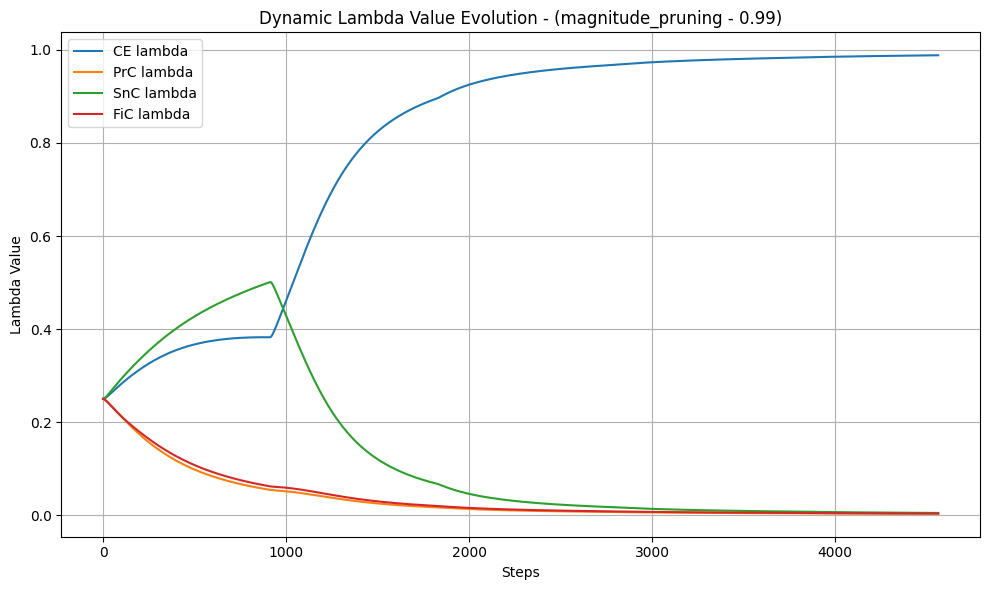

=== Lambda Statistics ===
CE lambda:
  Initial: 0.2500
  Final:   0.9886
  Change:  0.7386 (+295.43%)
  Mean:    0.7942
  StdDev:  0.2548

PrC lambda:
  Initial: 0.2500
  Final:   0.0030
  Change:  -0.2470 (-98.80%)
  Mean:    0.0350
  StdDev:  0.0521

SnC lambda:
  Initial: 0.2500
  Final:   0.0049
  Change:  -0.2451 (-98.06%)
  Mean:    0.1325
  StdDev:  0.1679

FiC lambda:
  Initial: 0.2500
  Final:   0.0036
  Change:  -0.2464 (-98.56%)
  Mean:    0.0383
  StdDev:  0.0536



In [4]:
print_dynamic_lambdas_statistics(lambda_history_1, PRUNING_TYPE, 0.95)
print_dynamic_lambdas_statistics(lambda_history_2, PRUNING_TYPE, 0.97)
print_dynamic_lambdas_statistics(lambda_history_3, PRUNING_TYPE, 0.99)